In [62]:
import json
from tqdm import tqdm
# import cloudscraper
import pandas as pd
import missingno as msno 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
import datetime
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
# from pycaret.regression import setup, compare_models,evaluate_model,predict_model,save_model
pd.set_option('display.float_format', '{:.6f}'.format)

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

In [63]:
df_raw= pd.read_csv('data.csv')

#### Data cleaning


In [64]:
df_raw = df_raw.drop(columns=['pty_characteristics','price_million_per_m2','shop_alias','date' ,'shop.alias', 'shop.status', 'shop.name', 'shop.address', 'shop.profileImageUrl', 'shop.createdDate', 'shop.modifiedDate', 'shop.urls', 'shop.shopsCategoriesRelationships', 'ad_id', 'list_id',  'account_id', 'account_oid', 'account_name', 'image', 'webp_image', 'videos', 'number_of_images', 'avatar', 'seller_info.full_name', 'seller_info.avatar', 'seller_info.sold_ads', 'seller_info.live_ads', 'has_video', 'company_logo', 'special_display_images', 'special_display', 'state', 'land_feature', 'street_id', 'size_unit', 'property_back_condition', 'property_road_condition', 'unitnumber_display', 'projectimages', 'project_oid', 'projectid', 'orig_list_time', 'streetnumber_display', 'ad_labels', 'label_campaigns', 'pty_jupiter', 'zero_deposit', 'escrow_can_deposit', 'protection_entitlement', 'owner', 'phone_hidden', 'contain_videos', 'type', 'params', 'address', 'location', 'longitude', 'latitude', 'company_ad', 'category', 'area', 'region','body', 'region_v2', 'area_v2', 'ward'], axis=1)

In [65]:
df_raw.drop(columns=['list_time','subject','price_string','ward_name','street_name'],inplace=True)

In [66]:
df_raw.rename(columns={
    'subject': 'TenBds',
    'category_name':'TheLoai',
    'area_name':'Huyen',
    'region_name':'Tinh',
    'price':'Gia',
    'rooms':'TongSoPhong',
    'property_legal_document':'GiayTo',
    'ward_name':'Phuong/Xa',
    'price_million_per_m2':'Gia/m2',
    'house_type':'LoaiHinhNhaO',
    'land_type':'LoaiHinhDat',
    'width':'ChieuNgang',
    'length':'ChieuDai',
    'toilets':'PhongVeSinh',
    'floors':'SoTang',
    'furnishing_sell':'NoiThat',
    'living_size':'DienTichSuDung',
    'commercial_type':'LoaiHinhVanPhong',
    'detail_address':'TenDuongCuThe',
    'direction':'HuongCuaChinh',
    'apartment_type':'LoaiHinhCanHo',
    'property_status':'TinhTrangBds',
    'street_number':'SoDuong',
    'block': 'TenPhanKhu/Lo/Block/Thap',
    'floornumber':'TangSo',
    'balconydirection':'HuongBanCong',
    'unitnumber':'MaLo',
    'apartment_feature':'DacDiemCanHoChungCu',
    'size':'DienTich(m2)',
    'street_name':'TenDuong'
    }, inplace=True)

In [67]:
df_raw.loc[df_raw['GiayTo']==1.0,['GiayTo']]='Đã có sổ'
df_raw.loc[df_raw['GiayTo']==2.0,['GiayTo']]='Đang chờ sổ'
df_raw.loc[df_raw['GiayTo']==3.0,['GiayTo']]='Giấy tờ khác'
df_raw.loc[df_raw['GiayTo']==4.0,['GiayTo']]='Hợp đồng đặt cọc'
df_raw.loc[df_raw['GiayTo']==5.0,['GiayTo']]='Sổ chung'
df_raw.loc[df_raw['GiayTo']==6.0,['GiayTo']]='Sổ hồng riêng'

df_raw.loc[df_raw['LoaiHinhNhaO']==1.0,['LoaiHinhNhaO']]='Nhà mặt phố, mặt tiền'
df_raw.loc[df_raw['LoaiHinhNhaO']==2.0,['LoaiHinhNhaO']]='Nhà ngõ, hẻm'
df_raw.loc[df_raw['LoaiHinhNhaO']==3.0,['LoaiHinhNhaO']]='Nhà phố liền kề'
df_raw.loc[df_raw['LoaiHinhNhaO']==4.0,['LoaiHinhNhaO']]='Nhà biệt thự'

df_raw.loc[df_raw['NoiThat']==1.0,['NoiThat']]='Noi That cao cấp'
df_raw.loc[df_raw['NoiThat']==2.0,['NoiThat']]='Noi That đầy đủ'
df_raw.loc[df_raw['NoiThat']==3.0,['NoiThat']]='Hoàn thiện cơ bản'
df_raw.loc[df_raw['NoiThat']==4.0,['NoiThat']]='Bàn giao thô'

df_raw.loc[df_raw['LoaiHinhVanPhong']==1.0,['LoaiHinhVanPhong']]='Shophouse'
df_raw.loc[df_raw['LoaiHinhVanPhong']==2.0,['LoaiHinhVanPhong']]='Officetel'
df_raw.loc[df_raw['LoaiHinhVanPhong']==3.0,['LoaiHinhVanPhong']]='Văn phòng'
df_raw.loc[df_raw['LoaiHinhVanPhong']==4.0,['LoaiHinhVanPhong']]='Mặt bằng kinh doanh'

df_raw.loc[df_raw['HuongCuaChinh']==1.0,['HuongCuaChinh']]='Đông'
df_raw.loc[df_raw['HuongCuaChinh']==2.0,['HuongCuaChinh']]='Tây'
df_raw.loc[df_raw['HuongCuaChinh']==3.0,['HuongCuaChinh']]='Nam'
df_raw.loc[df_raw['HuongCuaChinh']==4.0,['HuongCuaChinh']]='Bắc'
df_raw.loc[df_raw['HuongCuaChinh']==5.0,['HuongCuaChinh']]='Đông Bắc'
df_raw.loc[df_raw['HuongCuaChinh']==6.0,['HuongCuaChinh']]='Đông Nam'
df_raw.loc[df_raw['HuongCuaChinh']==7.0,['HuongCuaChinh']]='Tây Bắc'
df_raw.loc[df_raw['HuongCuaChinh']==8.0,['HuongCuaChinh']]='Tây Nam'

df_raw.loc[df_raw['HuongBanCong']==1.0,['HuongBanCong']]='Đông'
df_raw.loc[df_raw['HuongBanCong']==2.0,['HuongBanCong']]='Tây'
df_raw.loc[df_raw['HuongBanCong']==3.0,['HuongBanCong']]='Nam'
df_raw.loc[df_raw['HuongBanCong']==4.0,['HuongBanCong']]='Bắc'
df_raw.loc[df_raw['HuongBanCong']==5.0,['HuongBanCong']]='Đông Bắc'
df_raw.loc[df_raw['HuongBanCong']==6.0,['HuongBanCong']]='Đông Nam'
df_raw.loc[df_raw['HuongBanCong']==7.0,['HuongBanCong']]='Tây Bắc'
df_raw.loc[df_raw['HuongBanCong']==8.0,['HuongBanCong']]='Tây Nam'

df_raw.loc[df_raw['LoaiHinhCanHo']==1.0,['LoaiHinhCanHo']]='Chung cư'
df_raw.loc[df_raw['LoaiHinhCanHo']==2.0,['LoaiHinhCanHo']]='Căn hộ dịch vụ, mini'
df_raw.loc[df_raw['LoaiHinhCanHo']==3.0,['LoaiHinhCanHo']]='Duplex'
df_raw.loc[df_raw['LoaiHinhCanHo']==4.0,['LoaiHinhCanHo']]='Penthouse'
df_raw.loc[df_raw['LoaiHinhCanHo']==5.0,['LoaiHinhCanHo']]='Tập thể, cư xá'
df_raw.loc[df_raw['LoaiHinhCanHo']==6.0,['LoaiHinhCanHo']]='Officetel'

df_raw.loc[df_raw['TinhTrangBds']==1.0,['TinhTrangBds']]='Chưa bàn giao'
df_raw.loc[df_raw['TinhTrangBds']==2.0,['TinhTrangBds']]='Đã bàn giao'

df_raw.loc[df_raw['LoaiHinhDat']==1.0,['LoaiHinhDat']]='Đất thổ cư'
df_raw.loc[df_raw['LoaiHinhDat']==2.0,['LoaiHinhDat']]='Đất nền dự án'
df_raw.loc[df_raw['LoaiHinhDat']==3.0,['LoaiHinhDat']]='Đất nông nghiệp'
df_raw.loc[df_raw['LoaiHinhDat']==4.0,['LoaiHinhDat']]='Đất công nghiệp'

df_raw.loc[df_raw['DacDiemCanHoChungCu']==1.0,['DacDiemCanHoChungCu']]='Căn góc'


C:\Users\Admin\AppData\Local\Temp\ipykernel_20868\3094607576.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Đã có sổ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_raw.loc[df_raw['GiayTo']==1.0,['GiayTo']]='Đã có sổ'
C:\Users\Admin\AppData\Local\Temp\ipykernel_20868\3094607576.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Nhà mặt phố, mặt tiền' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_raw.loc[df_raw['LoaiHinhNhaO']==1.0,['LoaiHinhNhaO']]='Nhà mặt phố, mặt tiền'
C:\Users\Admin\AppData\Local\Temp\ipykernel_20868\3094607576.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Noi That cao cấp' has dtype incompatible with float64, please explicitly cast to a compatibl

In [68]:
for i in df_raw.columns:
    print(df_raw[i].value_counts())

TheLoai
Nhà ở                             26542
Đất                                7629
Căn hộ/Chung cư                    6195
Văn phòng, Mặt bằng kinh doanh      487
Phòng trọ                             1
Name: count, dtype: int64
Huyen
Thành phố Thủ Đức    3337
Quận 12              1987
Quận Bình Tân        1803
Quận Hoàng Mai       1725
Quận Đống Đa         1654
Quận Gò Vấp          1557
Quận Ngũ Hành Sơn    1377
Quận Tân Phú         1352
Quận Cầu Giấy        1331
Quận Liên Chiểu      1314
Quận Cẩm Lệ          1257
Quận 7               1211
Quận Bình Thạnh      1209
Quận Hà Đông         1134
Quận Tân Bình        1041
Huyện Bình Chánh     1025
Quận Sơn Trà         1007
Quận Thanh Xuân       996
Quận Long Biên        968
Quận Nam Từ Liêm      957
Quận Hai Bà Trưng     865
Quận Hải Châu         826
Quận 8                812
Quận Ba Đình          765
Huyện Hóc Môn         764
Quận Thanh Khê        723
Huyện Nhà Bè          648
Huyện Gia Lâm         587
Huyện Củ Chi          575
Huyện 

In [69]:
df_raw.head(5)

,TheLoai,Huyen,Tinh,Gia,TongSoPhong,GiayTo,DienTich(m2),LoaiHinhNhaO,LoaiHinhDat,ChieuNgang,ChieuDai,PhongVeSinh,SoTang,NoiThat,DienTichSuDung,LoaiHinhVanPhong,TenDuongCuThe,HuongCuaChinh,LoaiHinhCanHo,TinhTrangBds,SoDuong,TenPhanKhu/Lo/Block/Thap,TangSo,HuongBanCong,MaLo,DacDiemCanHoChungCu
0,Nhà ở,Quận Long Biên,Hà Nội,3290000000,4.000000,Đã có sổ,38.000000,Nhà phố liền kề,NaN,4.000000,9.500000,4.000000,4.000000,Noi That đầy đủ,112.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nhà ở,Quận Tây Hồ,Hà Nội,24000000000,11.000000,Đã có sổ,146.000000,"Nhà mặt phố, mặt tiền",NaN,NaN,NaN,NaN,8.000000,Noi That đầy đủ,NaN,NaN,NaN,Đông,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nhà ở,Quận Cầu Giấy,Hà Nội,6250000000,4.000000,Đã có sổ,34.000000,Nhà phố liền kề,NaN,NaN,NaN,4.000000,6.000000,Noi That cao cấp,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Căn hộ/Chung cư,Quận Đống Đa,Hà Nội,3500000000,3.000000,Sổ hồng riêng,90.000000,NaN,NaN,NaN,NaN,2.000000,NaN,Noi That cao cấp,NaN,NaN,NaN,NaN,"Tập thể, cư xá",Đã bàn giao,NaN,NaN,NaN,NaN,NaN,NaN
4,Nhà ở,Quận Ba Đình,Hà Nội,7200000000,4.000000,Đã có sổ,55.000000,Nhà phố liền kề,NaN,NaN,NaN,3.000000,4.000000,Noi That cao cấp,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df_raw.select_dtypes(['object']).describe()

,TheLoai,Huyen,Tinh,GiayTo,LoaiHinhNhaO,LoaiHinhDat,NoiThat,LoaiHinhVanPhong,TenDuongCuThe,HuongCuaChinh,LoaiHinhCanHo,TinhTrangBds,SoDuong,TenPhanKhu/Lo/Block/Thap,HuongBanCong,MaLo,DacDiemCanHoChungCu
count,40854,40853,40854,39074,26542,7629,18543,487,5255,11181,6195,6195,5351,2100,1650,1583,1162
unique,5,59,3,6,4,4,4,4,1413,8,6,2,2650,1273,8,822,1
top,Nhà ở,Thành phố Thủ Đức,Tp Hồ Chí Minh,Đã có sổ,Nhà phố liền kề,Đất thổ cư,Noi That đầy đủ,Mặt bằng kinh doanh,"Xã Đa Tốn, Kiêu Kỵ, Dương Xá và một phần thị t...",Đông Nam,Chung cư,Đã bàn giao,số 88,A,Đông Nam,1,Căn góc
freq,26542,3337,19798,33006,17279,6554,9035,384,377,2357,5517,4892,150,152,616,83,1162


In [71]:
df_c = df_raw.copy()


In [72]:
perce_null = df_c.isna().sum()*100/df_c.shape[0]
df_c= df_c.drop(columns=  perce_null[perce_null.values > 55].index )
# perce_null

In [73]:
df_c.select_dtypes(['object']).describe()

,TheLoai,Huyen,Tinh,GiayTo,LoaiHinhNhaO,NoiThat
count,40854,40853,40854,39074,26542,18543
unique,5,59,3,6,4,4
top,Nhà ở,Thành phố Thủ Đức,Tp Hồ Chí Minh,Đã có sổ,Nhà phố liền kề,Noi That đầy đủ
freq,26542,3337,19798,33006,17279,9035


In [74]:
df_c.describe()

,Gia,TongSoPhong,DienTich(m2),ChieuNgang,ChieuDai,PhongVeSinh,SoTang
count,40854.000000,32737.000000,40853.000000,23631.000000,20391.000000,24591.000000,18388.000000
mean,7894028777.748519,3.545804,129.764259,15.464205,19.299993,3.127852,3.701708
std,23489169657.313416,2.047753,1732.622733,922.677118,147.506917,1.598266,5.375369
min,400000.000000,1.000000,1.000000,1.200000,1.000000,1.000000,1.000000
25%,2700000000.000000,2.000000,45.000000,4.000000,11.000000,2.000000,2.000000
50%,4500000000.000000,3.000000,64.000000,4.800000,15.000000,3.000000,3.000000
75%,7500000000.000000,4.000000,95.000000,5.401450,20.000000,4.000000,5.000000
max,999999999999.000000,11.000000,260000.000000,120797.000000,13947.000000,7.000000,421.000000


In [75]:
fr =df_c.copy()
# fr['log_price']=np.log1p(fr['Giá'])
def scatt(x,fig):
    plt.subplot(5,3,fig)
    # plt.scatter(fr[x],fr['log_price'])
    plt.scatter(fr[x],fr['Gia'])
    plt.xlabel(x)
    plt.ylabel('price')

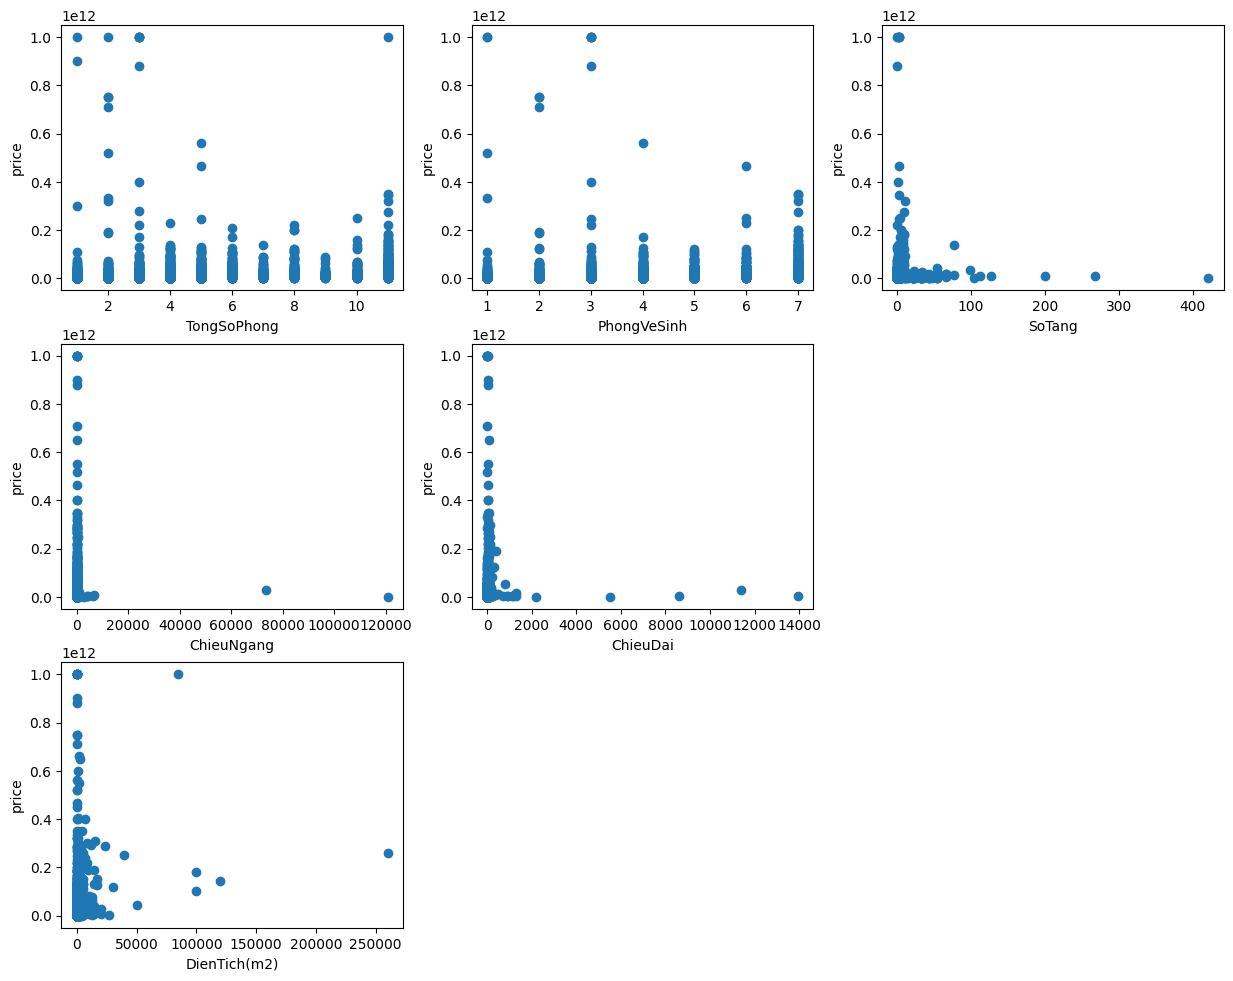

In [76]:
plt.figure(figsize=(15,20))
scatt('TongSoPhong',1)
scatt('PhongVeSinh',2)
scatt('SoTang',3)
scatt('ChieuNgang',4)
scatt('ChieuDai',5)
# scatt('DienTichSuDung',6)
scatt('DienTich(m2)',7)

In [77]:
df_c.isna().sum() 

TheLoai             0
Huyen               1
Tinh                0
Gia                 0
TongSoPhong      8117
GiayTo           1780
DienTich(m2)        1
LoaiHinhNhaO    14312
ChieuNgang      17223
ChieuDai        20463
PhongVeSinh     16263
SoTang          22466
NoiThat         22311
dtype: int64

#### Fill category and numeric missing value


In [78]:
q3_gia=df_c['Gia'].quantile(0.98)
df_c = df_c[(df_c['Gia'] < q3_gia)]

In [79]:
q3=df_c['DienTich(m2)'].quantile(0.99)
df_c= df_c[df_c['DienTich(m2)'] <=q3]

In [80]:
df_c = df_c[df_c['ChieuNgang'] <= 60000]

In [81]:
df_c = df_c[df_c['ChieuDai'] <= 2000]

In [82]:
# Fill the numeric missing values with mean values
for column in [
'ChieuNgang',
'ChieuDai',
'DienTich(m2)'
]:
    df_c[column].fillna(value=df_c[column].mean(),inplace=True)

In [83]:
# Fill the category null values with mode value
for column in [
'TongSoPhong',
'Huyen',
'GiayTo',
'LoaiHinhNhaO',
'PhongVeSinh',
'NoiThat',
'PhongVeSinh',
'SoTang',

]:
    df_c[column].fillna(value=df_c[column].mode()[0],inplace=True)

In [84]:
df_c.isna().sum()*100/df_c.shape[0]
# fr.shape

TheLoai        0.000000
Huyen          0.000000
Tinh           0.000000
Gia            0.000000
TongSoPhong    0.000000
GiayTo         0.000000
DienTich(m2)   0.000000
LoaiHinhNhaO   0.000000
ChieuNgang     0.000000
ChieuDai       0.000000
PhongVeSinh    0.000000
SoTang         0.000000
NoiThat        0.000000
dtype: float64

In [85]:
fr2 =df_c.copy()
def scatt(x,fig):
    plt.subplot(5,3,fig)

    plt.scatter(fr2[x],fr2['Gia'])
    plt.xlabel(x)
    plt.ylabel('price')

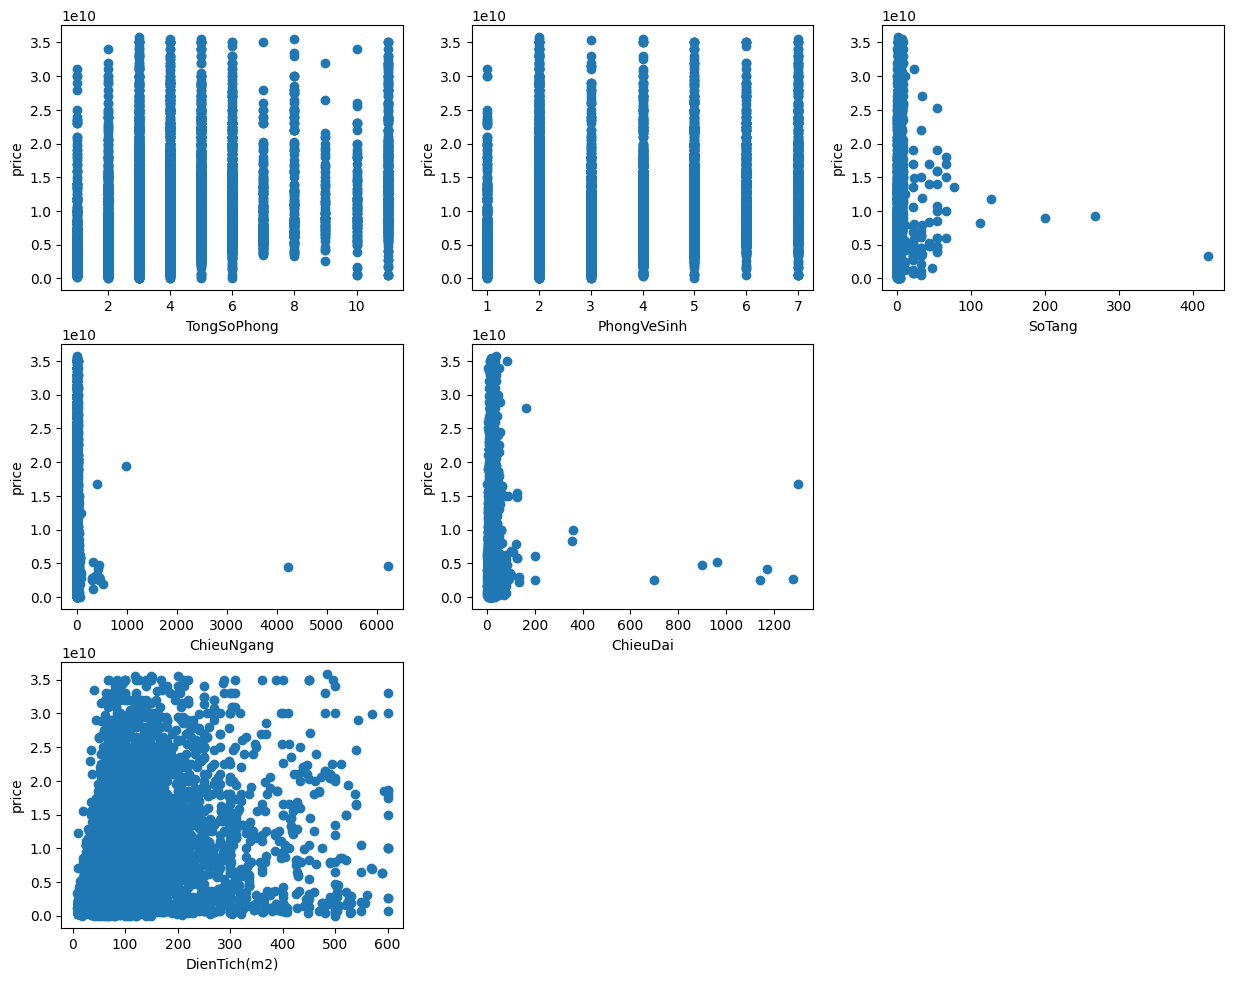

In [86]:
plt.figure(figsize=(15,20))
scatt('TongSoPhong',1)
scatt('PhongVeSinh',2)
scatt('SoTang',3)
scatt('ChieuNgang',4)
scatt('ChieuDai',5)
# scatt('DienTichSuDung',6)
scatt('DienTich(m2)',7)

In [87]:
df_c2=df_c.copy()

In [93]:
def barfunction(tinh):
    if tinh!='':
        df_tinh= df_c2[df_c2['Tinh']==tinh]
        frame = df_tinh.copy()
    else :
        frame =df_c2.copy()
    k = frame.groupby('Huyen')['Gia'].mean().reset_index(name='avg_price')
    frame = frame.merge(k,how='inner',on='Huyen')
    plt.figure(figsize=(15,8))
    plt.xticks(rotation=80)
    # plt.ylabel('USD')
    plt.bar(x='Huyen', height = 'avg_price', 
    data=frame)
    # plt.ticklabel_format(style='plain',axis='y')


<BarContainer object of 19726 artists>

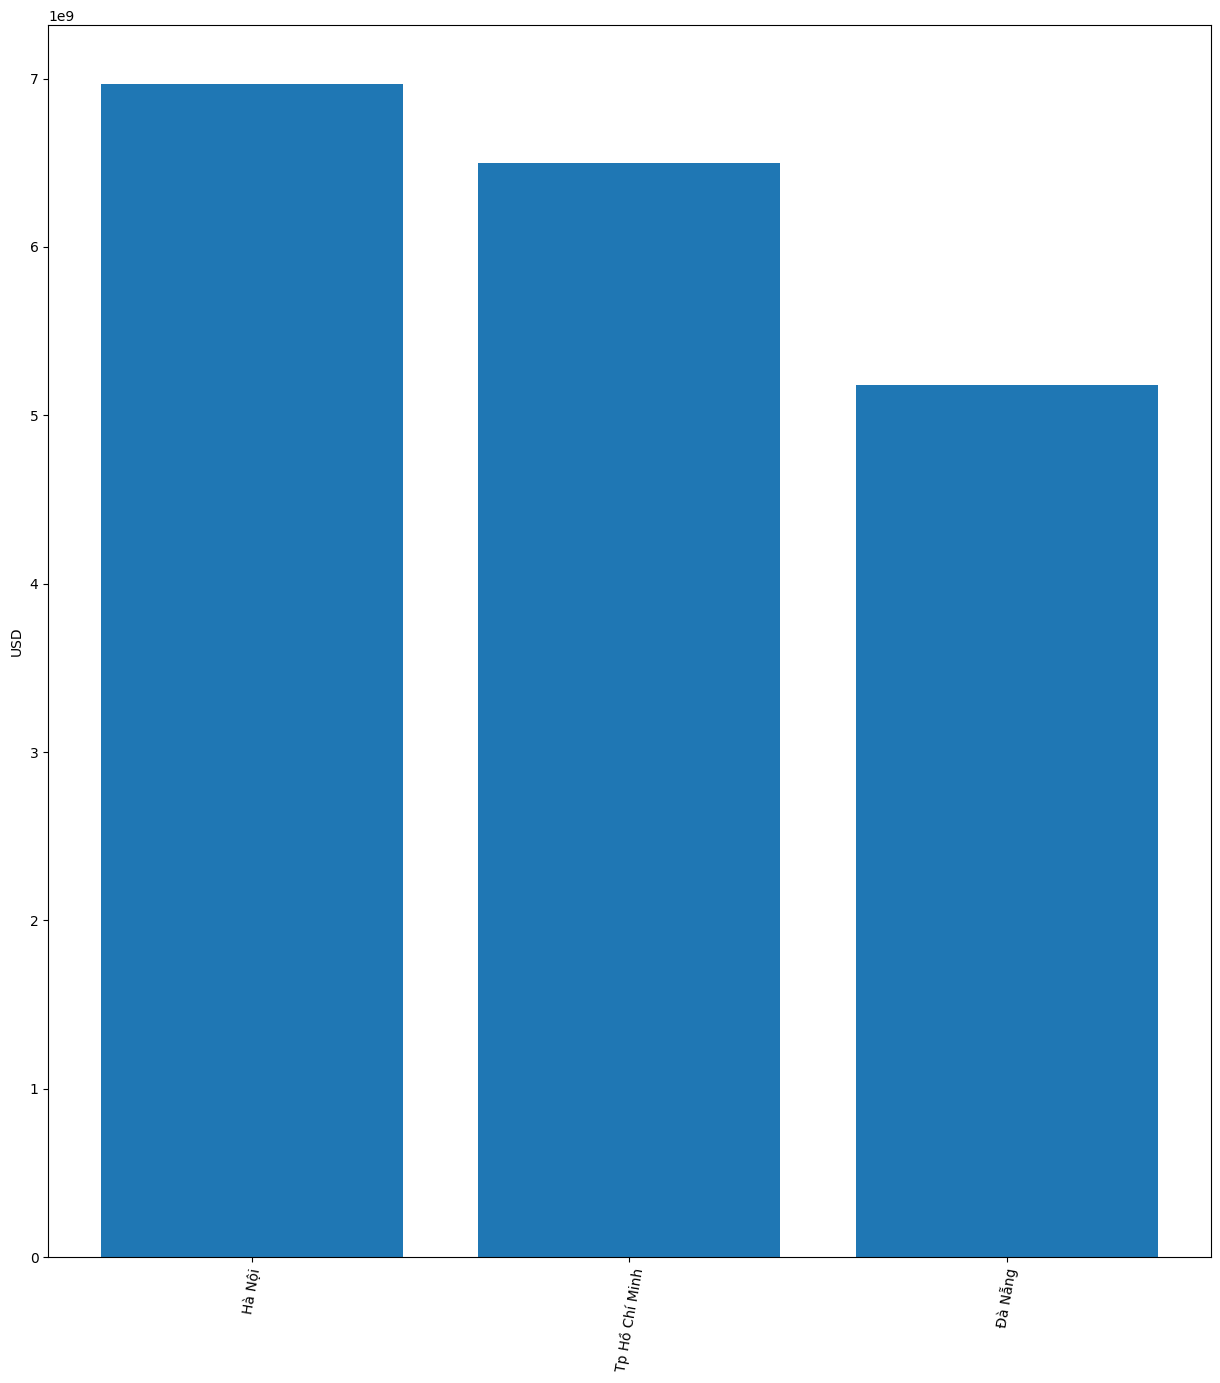

In [89]:
frame =df_c2.copy()
k = frame.groupby('Tinh')['Gia'].mean().reset_index(name='avg_price')
frame = frame.merge(k,how='inner',on='Tinh')
plt.figure(figsize=(15,16))
plt.xticks(rotation=80)
# plt.ylabel('USD')
plt.bar(x='Tinh', height = 'avg_price', data=frame)
    # plt.ticklabel_format(style='plain',axis='y')

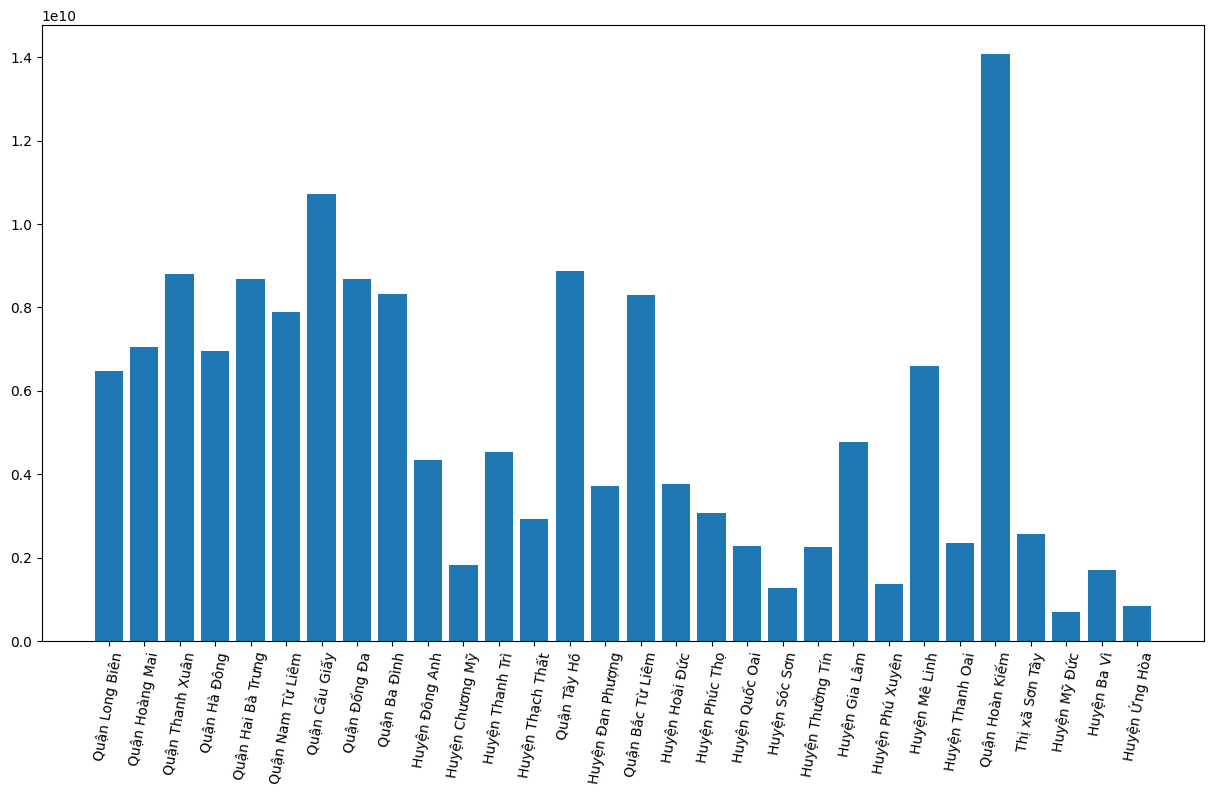

In [94]:
barfunction('Hà Nội')



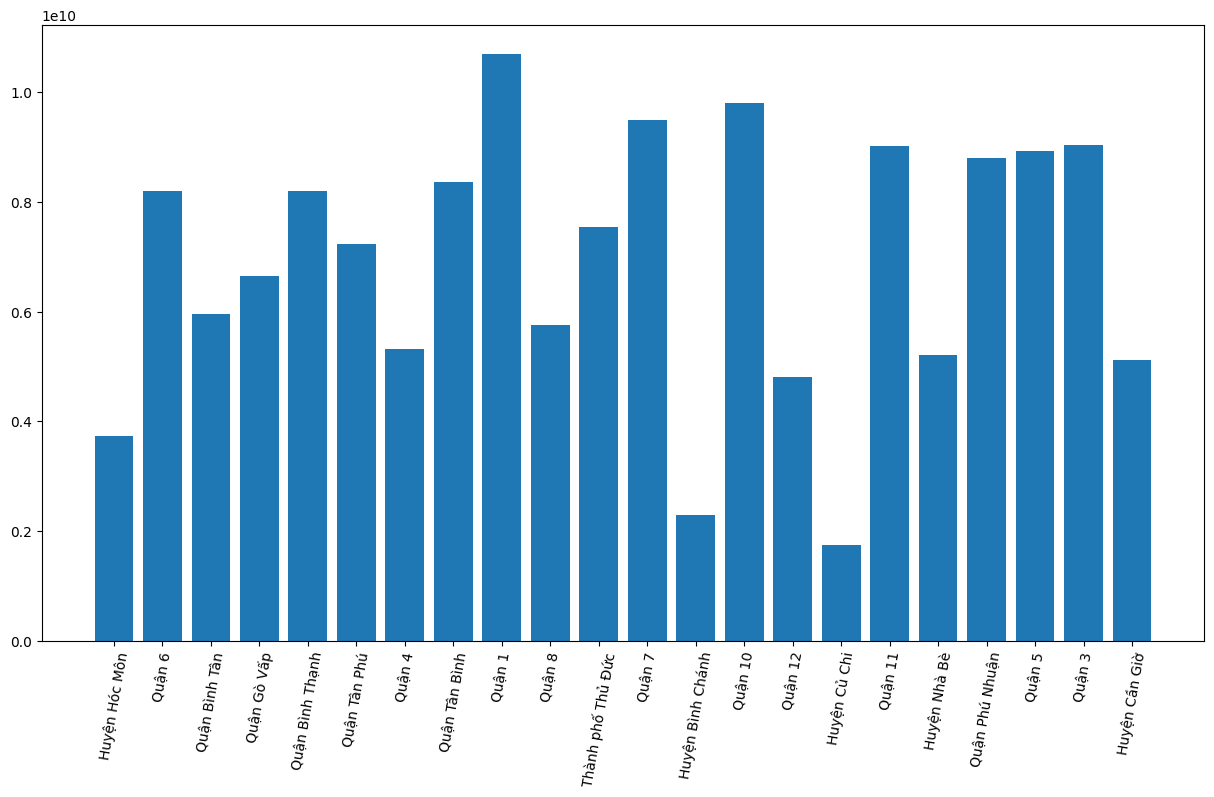

In [95]:
barfunction('Tp Hồ Chí Minh')


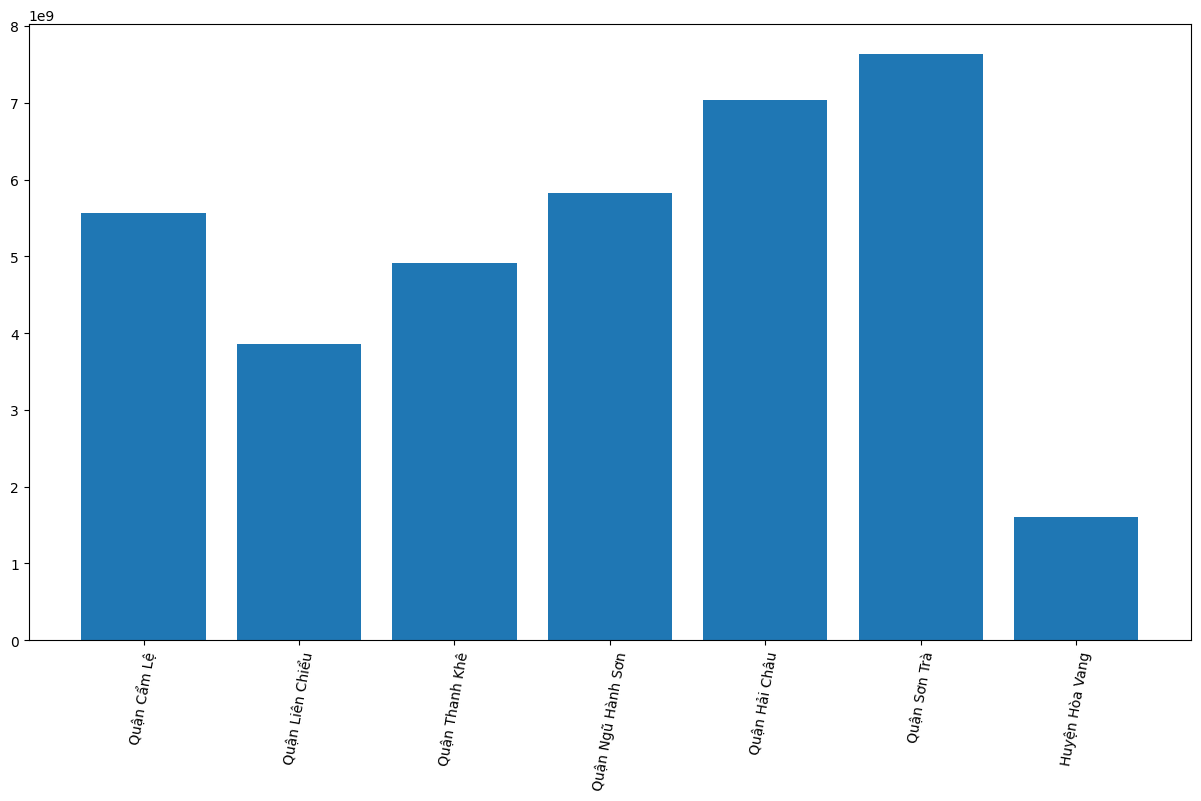

In [96]:
barfunction('Đà Nẵng')

In [97]:
def analysis(catrgorial):
    frame=df_c2.copy()
    k = frame.groupby(catrgorial)['Gia'].mean().reset_index(name='avg_price')
    frame = frame.merge(k,how='inner',on=catrgorial)
    plt.figure(figsize=(15,8))
    plt.xticks(rotation=80)
    plt.ylabel('USD')
    plt.bar(x=catrgorial, height = 'avg_price', data=frame)

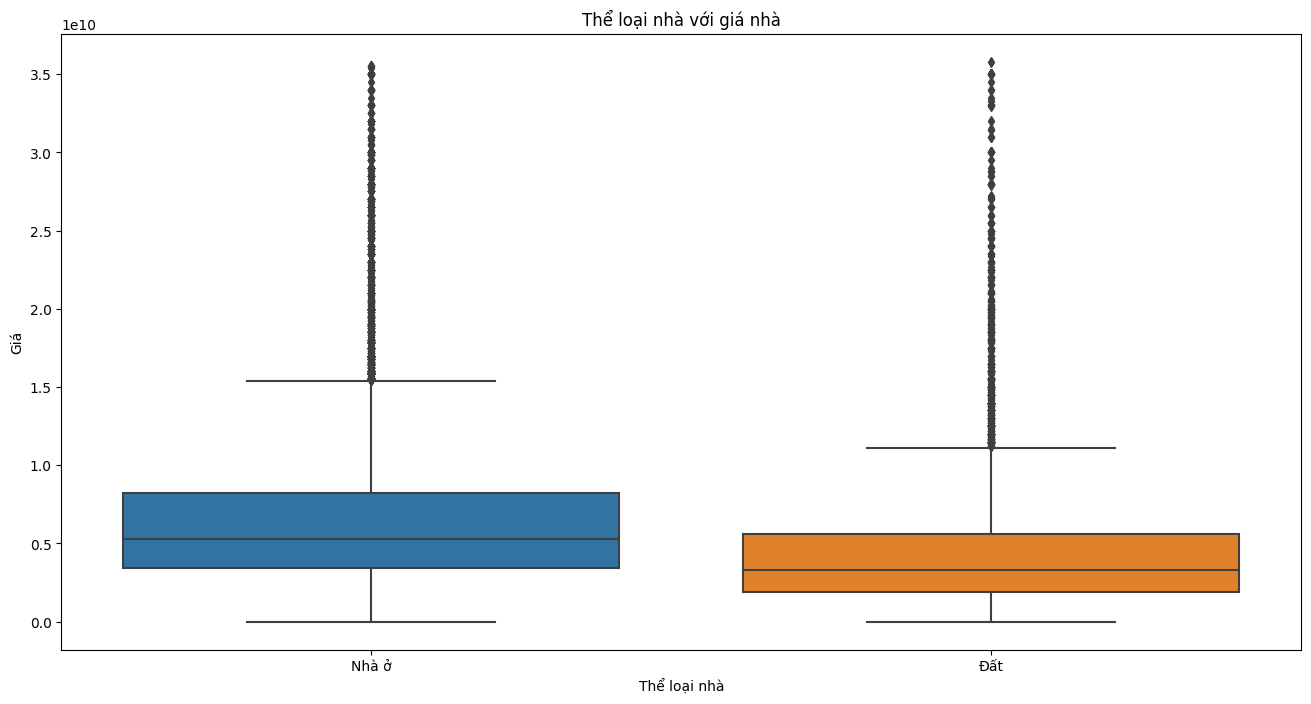

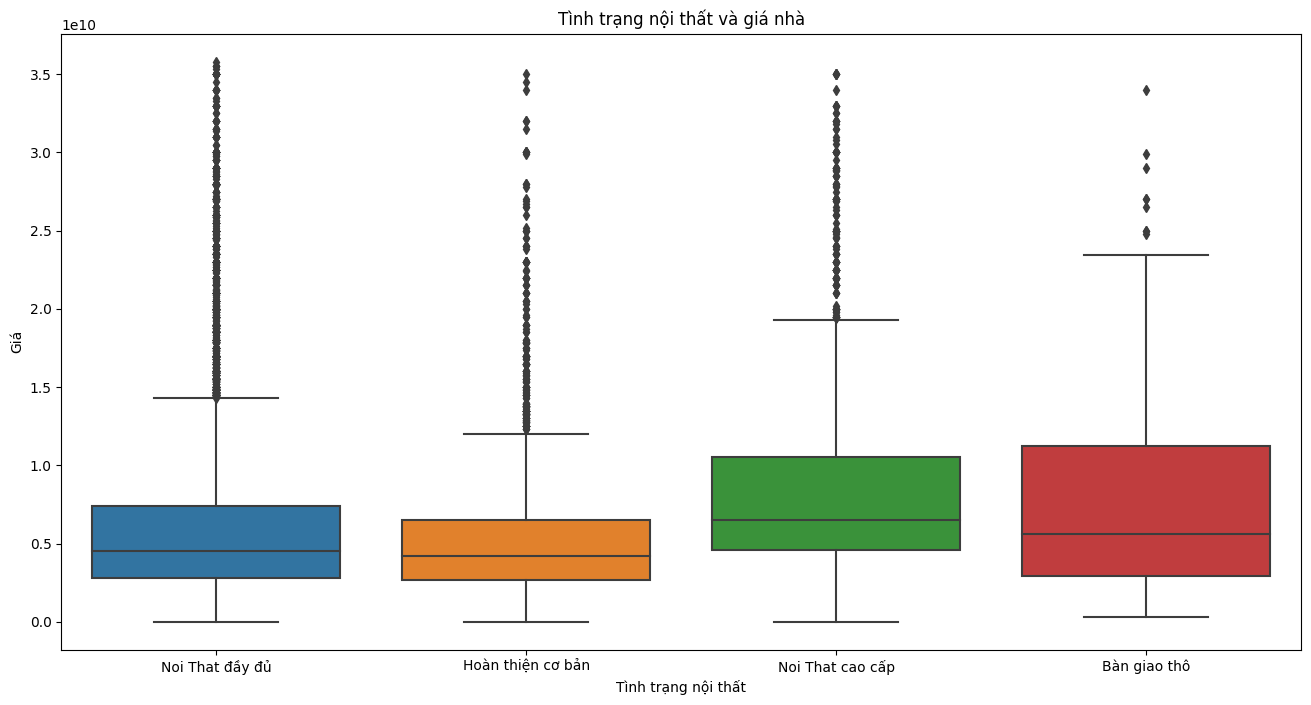

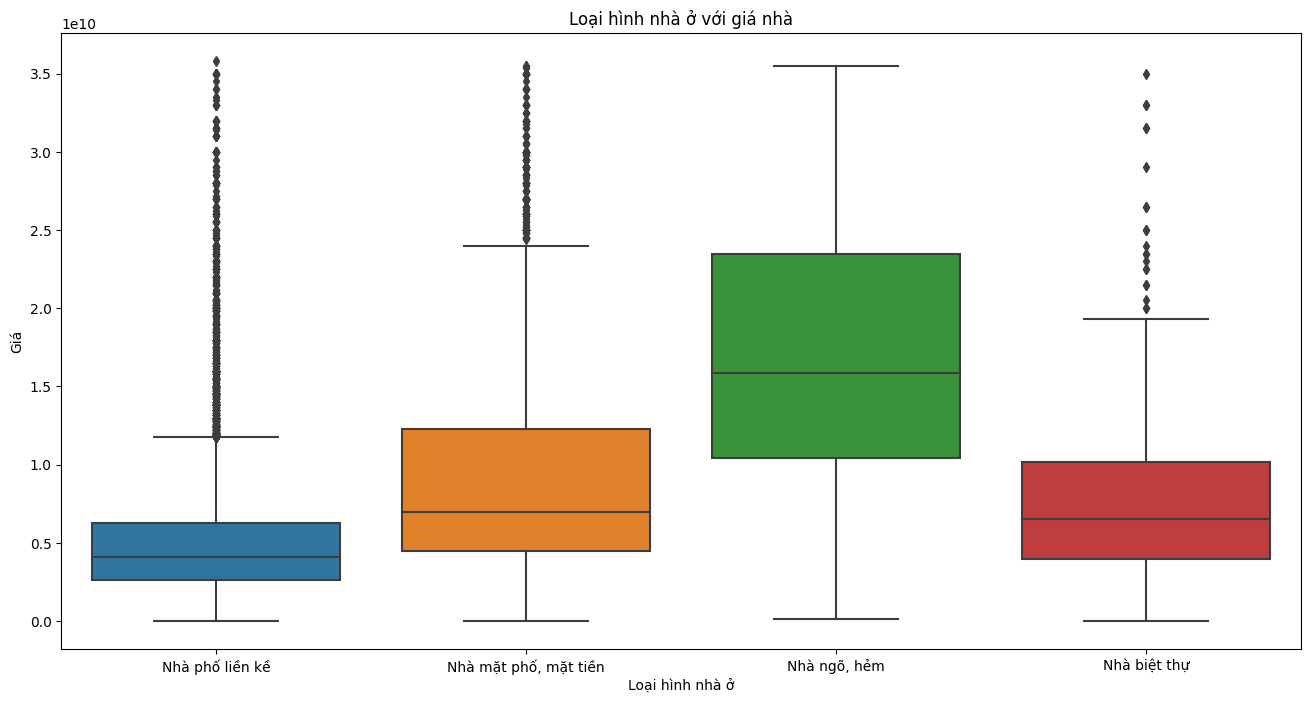

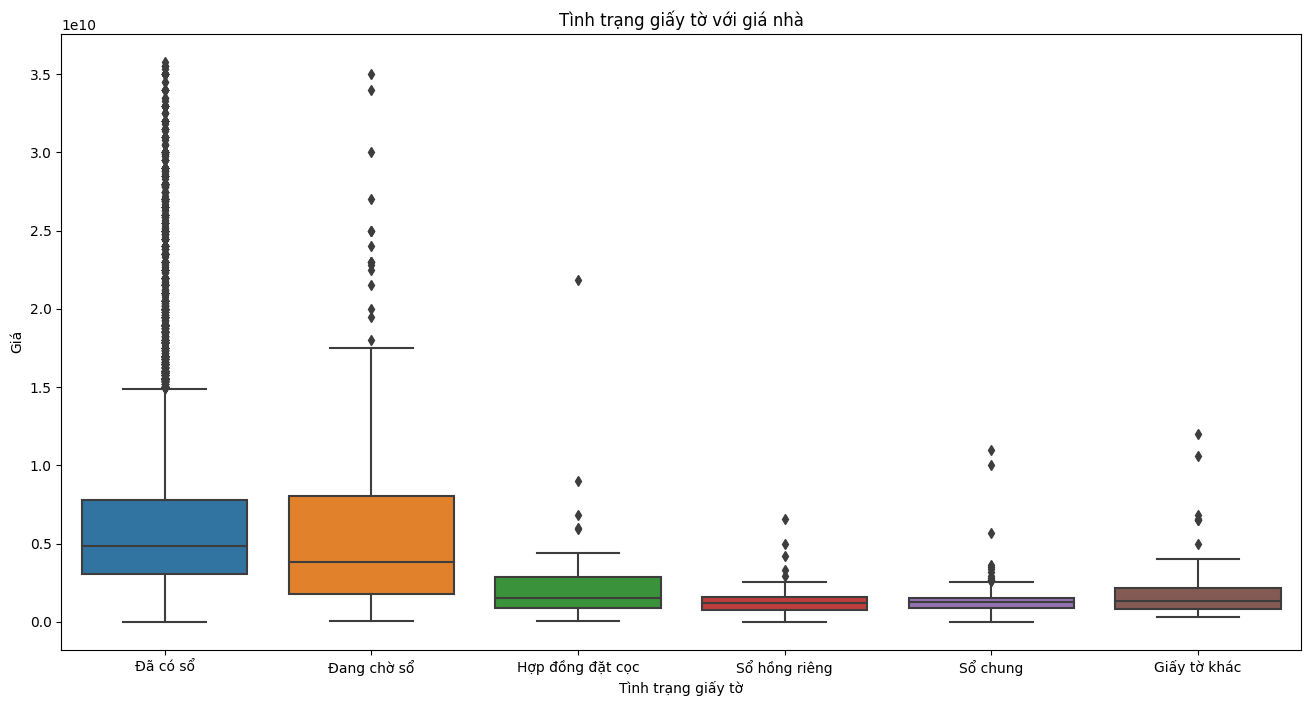

In [98]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df_c2,x='TheLoai',y='Gia')
plt.title('Thể loại nhà với giá nhà')
plt.xlabel('Thể loại nhà')
plt.ylabel('Giá')
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df_c2,x='NoiThat',y='Gia')
plt.title('Tình trạng nội thất và giá nhà')
plt.xlabel('Tình trạng nội thất')
plt.ylabel('Giá')
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df_c2,x='LoaiHinhNhaO',y='Gia')
plt.title('Loại hình nhà ở với giá nhà')
plt.xlabel('Loại hình nhà ở')
plt.ylabel('Giá')
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df_c2,x='GiayTo',y='Gia')
plt.title('Tình trạng giấy tờ với giá nhà')
plt.xlabel('Tình trạng giấy tờ')
plt.ylabel('Giá')
plt.show()

In [100]:
df_c2.describe(include='float64')

,TongSoPhong,DienTich(m2),ChieuNgang,ChieuDai,PhongVeSinh,SoTang
count,19726.000000,19726.000000,19726.000000,19726.000000,19726.000000,19726.000000
mean,3.455946,84.210202,6.091814,16.259776,2.868600,2.788908
std,1.650029,64.640994,54.929209,21.760735,1.411943,4.751524
min,1.000000,8.000000,1.500000,1.000000,1.000000,1.000000
25%,3.000000,48.000000,4.000000,11.000000,2.000000,2.000000
50%,3.000000,69.000000,4.544900,15.000000,2.000000,2.000000
75%,4.000000,100.000000,5.000000,20.000000,4.000000,3.000000
max,11.000000,600.000000,6222.000000,1300.000000,7.000000,421.000000


In [101]:
df_c2.isnull().sum()


TheLoai         0
Huyen           0
Tinh            0
Gia             0
TongSoPhong     0
GiayTo          0
DienTich(m2)    0
LoaiHinhNhaO    0
ChieuNgang      0
ChieuDai        0
PhongVeSinh     0
SoTang          0
NoiThat         0
dtype: int64

In [102]:
perce_null2 = df_c2.isna().sum()*100/df_raw.shape[0]
perce_null2


TheLoai        0.000000
Huyen          0.000000
Tinh           0.000000
Gia            0.000000
TongSoPhong    0.000000
GiayTo         0.000000
DienTich(m2)   0.000000
LoaiHinhNhaO   0.000000
ChieuNgang     0.000000
ChieuDai       0.000000
PhongVeSinh    0.000000
SoTang         0.000000
NoiThat        0.000000
dtype: float64

In [115]:
df_x = df_c2.drop(['Gia'],axis=1)
df_y=df_c2['Gia']

#### Feature Transformations¶


In [116]:
pd.set_option('display.float_format', '{:.2f}'.format)
skew_df = pd.DataFrame(df_x.select_dtypes(np.number).columns,columns=['Feature'])
# skew_df.drop(index=(0),inplace=True)
skew_df['skew']= skew_df['Feature'].apply(lambda x: scipy.stats.skew(df_x[x]))
skew_df['abs_skew']= skew_df['skew'].apply( lambda x : abs(x) )
skew_df['skewed']= skew_df['abs_skew'].apply(lambda x:  True if x >0.5 else False)
skew_df

,Feature,skew,abs_skew,skewed
0,TongSoPhong,2.39,2.39,True
1,DienTich(m2),3.30,3.30,True
2,ChieuNgang,96.93,96.93,True
3,ChieuDai,44.56,44.56,True
4,PhongVeSinh,1.28,1.28,True
5,SoTang,50.88,50.88,True


In [117]:
type(skew_df[skew_df['Feature'] == 'Gia'] )

pandas.core.frame.DataFrame

In [118]:
for i in skew_df['Feature']:
   if skew_df.loc[skew_df['Feature'] == i ,'skewed'].values == True:
      df_x[i] = df_x[i].apply(lambda x: np.log(x))


In [119]:
df4= df_x.copy()

#### Encode Categoricals

In [120]:
df4 = pd.get_dummies(data=df_x).astype(float)

In [121]:
df5=df4.copy()

In [122]:
df5.head()

,TongSoPhong,DienTich(m2),ChieuNgang,ChieuDai,PhongVeSinh,SoTang,TheLoai_Nhà ở,TheLoai_Đất,Huyen_Huyện Ba Vì,Huyen_Huyện Bình Chánh,Huyen_Huyện Chương Mỹ,Huyen_Huyện Cần Giờ,Huyen_Huyện Củ Chi,Huyen_Huyện Gia Lâm,Huyen_Huyện Hoài Đức,Huyen_Huyện Hòa Vang,Huyen_Huyện Hóc Môn,Huyen_Huyện Mê Linh,Huyen_Huyện Mỹ Đức,Huyen_Huyện Nhà Bè,Huyen_Huyện Phú Xuyên,Huyen_Huyện Phúc Thọ,Huyen_Huyện Quốc Oai,Huyen_Huyện Sóc Sơn,Huyen_Huyện Thanh Oai,Huyen_Huyện Thanh Trì,Huyen_Huyện Thường Tín,Huyen_Huyện Thạch Thất,Huyen_Huyện Đan Phượng,Huyen_Huyện Đông Anh,Huyen_Huyện Ứng Hòa,Huyen_Quận 1,Huyen_Quận 10,Huyen_Quận 11,Huyen_Quận 12,Huyen_Quận 3,Huyen_Quận 4,Huyen_Quận 5,Huyen_Quận 6,Huyen_Quận 7,Huyen_Quận 8,Huyen_Quận Ba Đình,Huyen_Quận Bình Thạnh,Huyen_Quận Bình Tân,Huyen_Quận Bắc Từ Liêm,Huyen_Quận Cầu Giấy,Huyen_Quận Cẩm Lệ,Huyen_Quận Gò Vấp,Huyen_Quận Hai Bà Trưng,Huyen_Quận Hoàn Kiếm,Huyen_Quận Hoàng Mai,Huyen_Quận Hà Đông,Huyen_Quận Hải Châu,Huyen_Quận Liên Chiểu,Huyen_Quận Long Biên,Huyen_Quận Nam Từ Liêm,Huyen_Quận Ngũ Hành Sơn,Huyen_Quận Phú Nhuận,Huyen_Quận Sơn Trà,Huyen_Quận Thanh Khê,Huyen_Quận Thanh Xuân,Huyen_Quận Tân Bình,Huyen_Quận Tân Phú,Huyen_Quận Tây Hồ,Huyen_Quận Đống Đa,Huyen_Thành phố Thủ Đức,Huyen_Thị xã Sơn Tây,Tinh_Hà Nội,Tinh_Tp Hồ Chí Minh,Tinh_Đà Nẵng,GiayTo_Giấy tờ khác,GiayTo_Hợp đồng đặt cọc,GiayTo_Sổ chung,GiayTo_Sổ hồng riêng,GiayTo_Đang chờ sổ,GiayTo_Đã có sổ,LoaiHinhNhaO_Nhà biệt thự,"LoaiHinhNhaO_Nhà mặt phố, mặt tiền","LoaiHinhNhaO_Nhà ngõ, hẻm",LoaiHinhNhaO_Nhà phố liền kề,NoiThat_Bàn giao thô,NoiThat_Hoàn thiện cơ bản,NoiThat_Noi That cao cấp,NoiThat_Noi That đầy đủ
0,1.39,3.64,1.39,2.25,1.39,1.39,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
7,1.10,3.69,1.50,2.20,1.39,0.69,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
18,1.10,3.81,1.40,2.40,0.69,0.69,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
29,1.10,3.56,1.25,2.30,1.39,1.79,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
34,1.10,3.76,2.08,1.61,0.69,0.69,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00


#### Scaling 


In [123]:
pd.set_option('display.float_format', '{:.8f}'.format)
scalar = StandardScaler()
scaled = scalar.fit(df5)
data_preprocessing = scaled.transform(df5)
df5 = pd.DataFrame(data=data_preprocessing,index=df5.index, columns=df5.columns)
df5

,TongSoPhong,DienTich(m2),ChieuNgang,ChieuDai,PhongVeSinh,SoTang,TheLoai_Nhà ở,TheLoai_Đất,Huyen_Huyện Ba Vì,Huyen_Huyện Bình Chánh,Huyen_Huyện Chương Mỹ,Huyen_Huyện Cần Giờ,Huyen_Huyện Củ Chi,Huyen_Huyện Gia Lâm,Huyen_Huyện Hoài Đức,Huyen_Huyện Hòa Vang,Huyen_Huyện Hóc Môn,Huyen_Huyện Mê Linh,Huyen_Huyện Mỹ Đức,Huyen_Huyện Nhà Bè,Huyen_Huyện Phú Xuyên,Huyen_Huyện Phúc Thọ,Huyen_Huyện Quốc Oai,Huyen_Huyện Sóc Sơn,Huyen_Huyện Thanh Oai,Huyen_Huyện Thanh Trì,Huyen_Huyện Thường Tín,Huyen_Huyện Thạch Thất,Huyen_Huyện Đan Phượng,Huyen_Huyện Đông Anh,Huyen_Huyện Ứng Hòa,Huyen_Quận 1,Huyen_Quận 10,Huyen_Quận 11,Huyen_Quận 12,Huyen_Quận 3,Huyen_Quận 4,Huyen_Quận 5,Huyen_Quận 6,Huyen_Quận 7,Huyen_Quận 8,Huyen_Quận Ba Đình,Huyen_Quận Bình Thạnh,Huyen_Quận Bình Tân,Huyen_Quận Bắc Từ Liêm,Huyen_Quận Cầu Giấy,Huyen_Quận Cẩm Lệ,Huyen_Quận Gò Vấp,Huyen_Quận Hai Bà Trưng,Huyen_Quận Hoàn Kiếm,Huyen_Quận Hoàng Mai,Huyen_Quận Hà Đông,Huyen_Quận Hải Châu,Huyen_Quận Liên Chiểu,Huyen_Quận Long Biên,Huyen_Quận Nam Từ Liêm,Huyen_Quận Ngũ Hành Sơn,Huyen_Quận Phú Nhuận,Huyen_Quận Sơn Trà,Huyen_Quận Thanh Khê,Huyen_Quận Thanh Xuân,Huyen_Quận Tân Bình,Huyen_Quận Tân Phú,Huyen_Quận Tây Hồ,Huyen_Quận Đống Đa,Huyen_Thành phố Thủ Đức,Huyen_Thị xã Sơn Tây,Tinh_Hà Nội,Tinh_Tp Hồ Chí Minh,Tinh_Đà Nẵng,GiayTo_Giấy tờ khác,GiayTo_Hợp đồng đặt cọc,GiayTo_Sổ chung,GiayTo_Sổ hồng riêng,GiayTo_Đang chờ sổ,GiayTo_Đã có sổ,LoaiHinhNhaO_Nhà biệt thự,"LoaiHinhNhaO_Nhà mặt phố, mặt tiền","LoaiHinhNhaO_Nhà ngõ, hẻm",LoaiHinhNhaO_Nhà phố liền kề,NoiThat_Bàn giao thô,NoiThat_Hoàn thiện cơ bản,NoiThat_Noi That cao cấp,NoiThat_Noi That đầy đủ
0,0.57062236,-0.99087563,-0.54408962,-0.95374038,0.97352260,1.10086915,0.56997431,-0.56997431,-0.01006972,-0.18880852,-0.05190422,-0.02665009,-0.14349874,-0.03967371,-0.07888739,-0.13479124,-0.18517858,-0.03416628,-0.02467194,-0.15707973,-0.01592284,-0.01884111,-0.04781704,-0.04030956,-0.03562262,-0.05794023,-0.07657712,-0.04450846,-0.01233315,-0.09542427,-0.00712019,-0.08928261,-0.11890370,-0.07921206,-0.28636198,-0.10668777,-0.08332057,-0.06260012,-0.10932982,-0.19322779,-0.16010317,-0.08605311,-0.20506013,-0.27050580,-0.07029700,-0.12172239,-0.20506013,-0.24371807,-0.08575367,-0.02362098,-0.13977447,-0.11846445,-0.13163784,-0.20398398,8.37931957,-0.08664897,-0.19477522,-0.11912276,-0.14349874,-0.12594273,-0.09861863,-0.19181178,-0.20918635,-0.07280229,-0.11912276,-0.31083753,-0.02252115,2.31630722,-1.37903437,-0.48041443,-0.05523541,-0.04938899,-0.12902291,-0.06052583,-0.10497345,0.19435424,-0.19266246,-0.55482430,-0.12427075,0.63347683,-0.11443950,-0.35475200,-0.38669600,0.58472623
7,-0.12923762,-0.90619594,-0.22507397,-1.07594782,0.97352260,-0.38354643,0.56997431,-0.56997431,-0.01006972,-0.18880852,-0.05190422,-0.02665009,-0.14349874,-0.03967371,-0.07888739,-0.13479124,-0.18517858,-0.03416628,-0.02467194,-0.15707973,-0.01592284,-0.01884111,-0.04781704,-0.04030956,-0.03562262,-0.05794023,-0.07657712,-0.04450846,-0.01233315,-0.09542427,-0.00712019,-0.08928261,-0.11890370,-0.07921206,-0.28636198,-0.10668777,-0.08332057,-0.06260012,-0.10932982,-0.19322779,-0.16010317,-0.08605311,-0.20506013,-0.27050580,-0.07029700,-0.12172239,-0.20506013,-0.24371807,-0.08575367,-0.02362098,7.15438224,-0.11846445,-0.13163784,-0.20398398,-0.11934143,-0.08664897,-0.19477522,-0.11912276,-0.14349874,-0.12594273,-0.09861863,-0.19181178,-0.20918635,-0.07280229,-0.11912276,-0.31083753,-0.02252115,2.31630722,-1.37903437,-0.48041443,-0.05523541,-0.04938899,-0.12902291,-0.06052583,-0.10497345,0.19435424,-0.19266246,-0.55482430,-0.12427075,0.63347683,-0.11443950,-0.35475200,-0.38669600,0.58472623
18,-0.12923762,-0.71174885,-0.51044319,-0.61212366,-0.56836416,-0.38354643,-1.75446505,1.75446505,-0.01006972,-0.18880852,-0.05190422,-0.02665009,-0.14349874,-0.03967371,-0.07888739,-0.13479124,-0.18517858,-0.03416628,-0.02467194,-0.15707973,-0.01592284,-0.01884111,-0.04781704,-0.04030956,-0.03562262,-0.05794023,-0.07657712,-0.04450846,-0.01233315,-0.09542427,-0.00712019,-0

In [124]:
# k = df_y.apply(lambda x: np.log(x))
# sns.displot(data=k,kde=True)
k = df_y

Train and Evaluate

In [125]:
x_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(df5, k, test_size=0.2, random_state=105)
model = LinearRegression()
model.fit(x_train_lr,y_train_lr)
y_predictlr= model.predict(X_test_lr)



In [126]:
y_predictlr

array([3.16918438e+09, 8.71792090e+09, 2.45833149e+09, ...,
       1.34659386e+10, 1.28036317e+10, 1.74672550e+09])

Explained variance regression score
Best possible score is 1.0, lower values are worse.

In [128]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

print(r2_score(y_test_lr, y_predictlr))
# print(explained_variance_score(y_test_lr, y_predictlr))

0.5805718602196204


In [132]:
# scores = cross_val_score(model, df5, k, cv=20, scoring='r2')
# print(f"Cross-validated scores: {scores}")
# print(f"Mean cross-validated score: {scores.mean()}")

Cross-validated scores: [ 5.69385190e-01 -3.63815912e+23  5.59063845e-01  5.66697618e-01
  5.93962639e-01  5.95028720e-01  5.99458774e-01  5.95209750e-01
  5.85840649e-01  6.38779235e-01  6.13897571e-01  5.65822934e-01
  5.96332552e-01  6.20472928e-01  6.35037619e-01  6.29060581e-01
  5.17216124e-01  4.73399164e-01  3.97449635e-01  4.73246340e-01]
Mean cross-validated score: -1.8190795593652434e+22


In [134]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
print(mean_squared_error(y_test_lr, y_predictlr))

# print(median_absolute_error(np.exp(y_test_lr), np.exp(y_predictlr)))
rmse = mean_squared_error(y_test_lr,  y_predictlr, squared=False)
rmse


1.2411719069059832e+19


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3523026975.3522797

In [137]:
perc = np.abs((y_predictlr - y_test_lr))/y_test_lr
perc = perc.values*100
(perc)

array([27.14518658,  8.23241162,  0.87373017, ...,  5.83844999,
       82.90902491, 34.08583004])

In [138]:
df_y.sort_values()

12702         450000
34852        1100000
32717        1150000
40652        1150000
7568         1150000
            ...     
12946    35365000000
12863    35500000000
25207    35500000000
29396    35500000000
31328    35800000000
Name: Gia, Length: 19726, dtype: int64

In [142]:
data = {'Gia du doan':y_predictlr,
        'Gia thuc':y_test_lr,
       '% sai lech': perc}
A = pd.DataFrame(data)
B = A.sort_values(by=['% sai lech'])
B.describe()

,Gia du doan,Gia thuc,% sai lech
count,3946.00000000,3946.00000000,3946.00000000
mean,6290685873.89037132,6265153185.91611767,120.23909388
std,4191680958.77650213,5440542698.39478302,1824.36459379
min,-8639878528.16618538,11000000.00000000,0.04330429
25%,3466390143.83381510,2850000000.00000000,14.15389734
50%,5932935807.83381462,4600000000.00000000,31.60129957
75%,8778263167.83381462,7500000000.00000000,63.43176017
max,26895919459.79660797,35800000000.00000000,67970.02808797


<Axes: xlabel='Gia thuc', ylabel='% sai lech'>

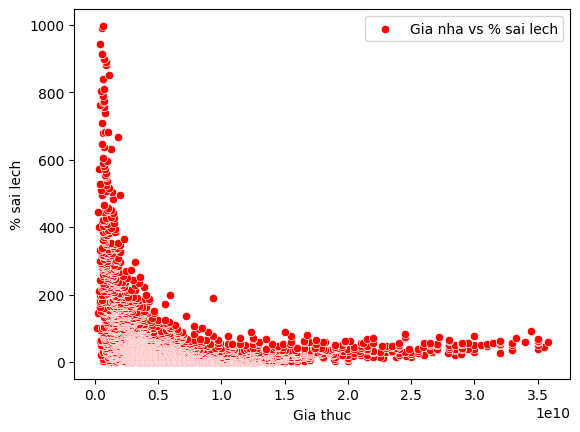

In [145]:
sns.scatterplot(x='Gia thuc', y='% sai lech', data=B[B['% sai lech'] <=1000], label='Gia nha vs % sai lech', color='r', marker='o')


<!-- Thuat toan reandom forest -->